# 从高位数据向低维数据的映射
> 前面推导除了获取原始数据的n个主成分的方法，这一节就用上一节封装的方法完成PCA最大的作用，即数据降维

## 降维 
> 把原始数据X从n维降维到k维(从n列降为k列，每列的含义是一个特征，每行是一个样本)
![Xn降维到Xk减少了特征数或维度数](images/Xn降维到Xk减少了特征数或维度数.png)
```python
def transform(self, X):
    """将给定的X，映射到各个主成分分量中"""
    assert X.shape[1] == self.components_.shape[1]
    return X.dot(self.components_.T)
```

## 还原
> 利用Xk点乘Wk完成升维，近似恢复到原始数据X，但是不可能完全恢复地，因为降维过程中的数据丢失是必可避免而且不可逆地
![数据还原或升维但是不可能完全还原地](images/数据还原或升维但是不可能完全还原地.png)
```python
def inverse_transform(self, X):
    """将给定的X，反向映射回原来的特征空间"""
    assert X.shape[1] == self.components_.shape[0]
    return X.dot(self.components_)
```

> 上面的降维和还原地过程都封装在`playML/PCA.py`里面了，下面利用封装的方法进行测试

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))

In [3]:
X[:, 0] = np.random.uniform(0., 100., size=100)

In [5]:
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

In [6]:
X.shape

(100, 2)

In [8]:
X[:5, :]

array([[69.76737964, 55.17569708],
       [62.96939249, 35.42724014],
       [63.52415618, 52.31341863],
       [43.61006368, 44.79007066],
       [ 6.9956719 , 10.89434416]])

In [9]:
from playML.PCA import PCA

In [10]:
pca = PCA(n_components=2) # 对2维数据进行PCA转换

In [11]:
pca.fit(X)

PCA(n_components=2)

In [12]:
pca.components_ # X是二维的(两列)，所以只有两个主成分

array([[ 0.74910873,  0.66244706],
       [ 0.66244957, -0.74910651]])

In [13]:
pca.components_[0].dot(pca.components_[1]) # 相邻两个主成分向量是垂直的

3.349524059836906e-06

## 下面把二维数据降维到1维

In [14]:
pca = PCA(n_components=1) # 降到1维
pca.fit(X)

PCA(n_components=1)

In [15]:
pca.components_

array([[0.74910883, 0.66244694]])

In [16]:
X_reduction = pca.transform(X) # 降维后的X为X_reduction

In [17]:
X_reduction.shape # 从(100, 2)变成了(100, 1)，从二维降到了一维

(100, 1)

## 把降维后的数据恢复回去
> 不可能完全恢复，因为数据丢失是必然的

In [19]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape # 可以看到维度又恢复回去了

(100, 2)

## 下面对比下降维和恢复地数据
> 恢复后的数据全聚集在第1主成分上了

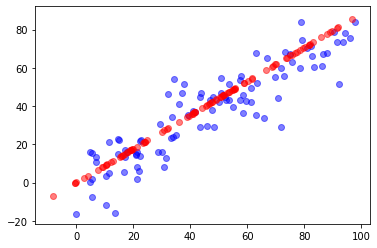

In [20]:
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5) # 原始数据，用蓝色表示
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5) # 降维后恢复地数据，可以看到全部都聚集到第1主成分上了
plt.show()